In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset (replace 'retail_data.csv' with your actual file path)
data = pd.read_csv('C:/Users/mahap/Desktop/PGDBDA/MyProjects/retail_sales_dataset.csv')
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [9]:
# Data Cleaning
# Handle missing values (example: fill with 0 for numerical columns)
data.fillna(0, inplace=True)

In [11]:
# Check for and handle duplicates
data.drop_duplicates(inplace=True)

In [13]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print(data.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [23]:
# 2. Sales Analysis
print("Total Revenue:", data['Total Amount'].sum())
print("Average Transaction Value:", data['Total Amount'].mean())


Total Revenue: 456000
Average Transaction Value: 456.0


Top 5 Product Categories:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


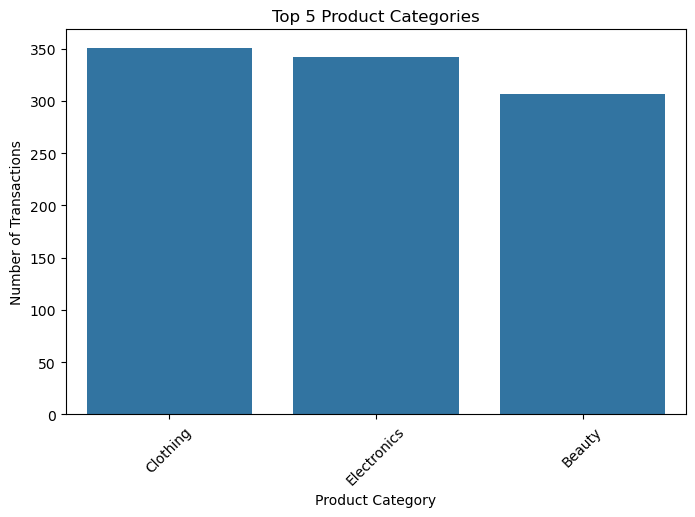

In [25]:
# 3. Product Category Analysis
top_categories = data['Product Category'].value_counts().head(5)
print("Top 5 Product Categories:")
print(top_categories)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xlabel("Product Category")
plt.ylabel("Number of Transactions")
plt.title("Top 5 Product Categories")
plt.xticks(rotation=45)
plt.show()

In [28]:
# 4. Customer Analysis
print("Number of Unique Customers:", data['Customer ID'].nunique())
print("Average Transactions per Customer:", data.groupby('Customer ID')['Transaction ID'].count().mean())


Number of Unique Customers: 1000
Average Transactions per Customer: 1.0


Total Sales by Gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


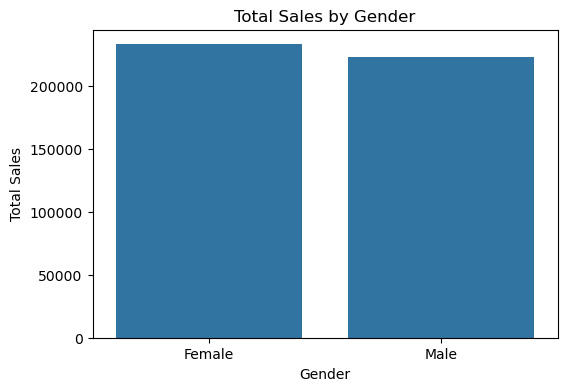

In [30]:
# 5. Gender Analysis
gender_sales = data.groupby('Gender')['Total Amount'].sum()
print("Total Sales by Gender:")
print(gender_sales)
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_sales.index, y=gender_sales.values)
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.title("Total Sales by Gender")
plt.show()

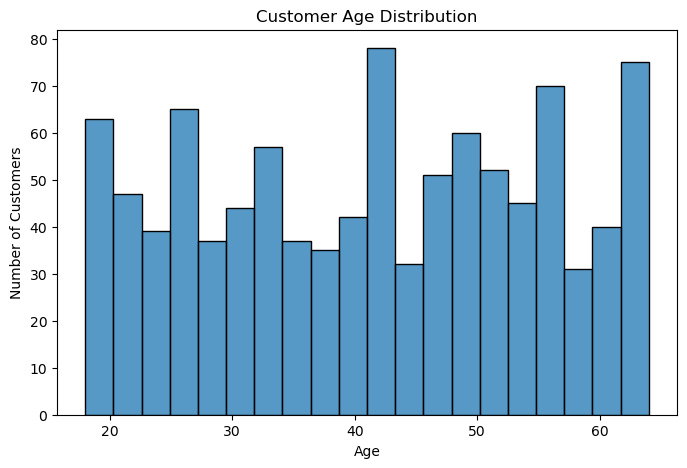

In [32]:
# 6. Age Analysis
# (You can further analyze age with histograms, box plots, and potentially segment customers by age groups)
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=20)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Customer Age Distribution")
plt.show()


C:\Users\mahap\AppData\Local\Temp\ipykernel_9876\1629972784.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.groupby(pd.Grouper(key='Date', freq='M'))['Total Amount'].sum()


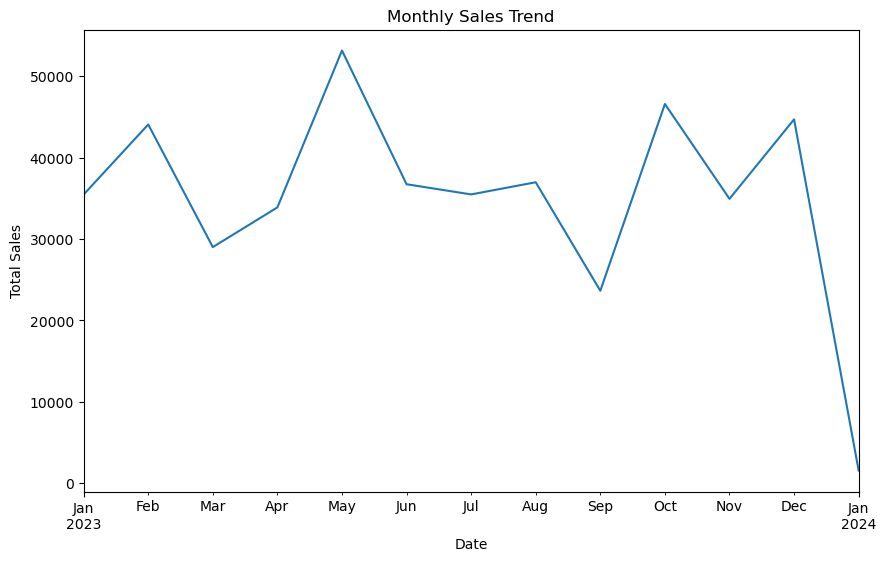

In [34]:
# 7. Time Series Analysis (if 'Date' column is in appropriate format)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date']) 
    monthly_sales = data.groupby(pd.Grouper(key='Date', freq='M'))['Total Amount'].sum()
    plt.figure(figsize=(10, 6))
    monthly_sales.plot()
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.title("Monthly Sales Trend")
    plt.show()

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from prophet import Prophet

In [43]:
# Check for missing values
print(data.isnull().sum()) 

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [47]:
# --- 3. Feature Engineering (RFM Analysis) ---

data['Date'] = pd.to_datetime(data['Date']) 
data['Last_Purchase_Date'] = data.groupby('Customer ID')['Date'].transform('max')
recent_date = data['Last_Purchase_Date'].max()
data['Recency'] = (recent_date - data['Last_Purchase_Date']).dt.days

data['Frequency'] = data.groupby('Customer ID')['Transaction ID'].transform('count')

data['Monetary'] = data.groupby('Customer ID')['Total Amount'].transform('sum')
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Last_Purchase_Date,Recency,Frequency,Monetary
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11-24,38,1,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02-27,308,1,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01-13,353,1,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05-21,225,1,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05-06,240,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023-05-16,230,1,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023-11-17,45,1,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023-10-29,64,1,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023-12-05,27,1,150


In [51]:
# --- 4. Advanced Analytics (Optional) ---

# 4.1 Customer Segmentation (K-Means Clustering)

rfm_data = data[['Recency', 'Frequency', 'Monetary']].drop_duplicates() 
rfm_data

,Recency,Frequency,Monetary
0,38,1,150
1,308,1,1000
2,353,1,30
3,225,1,500
4,240,1,100
...,...,...,...
994,246,1,30
995,230,1,50
996,45,1,90
997,64,1,100


In [55]:
# Standardize the data (optional, but recommended for K-Means)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)
rfm_scaled

array([[-1.35332542,  0.        , -0.55678779],
       [ 1.19740679,  0.        ,  0.96284043],
       [ 1.62252883,  0.        , -0.77132354],
       ...,
       [-1.28719533,  0.        , -0.66405566],
       [-1.10769936,  0.        , -0.64617768],
       [-1.45724414,  0.        , -0.55678779]])

C:\Users\mahap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mahap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mahap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mahap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

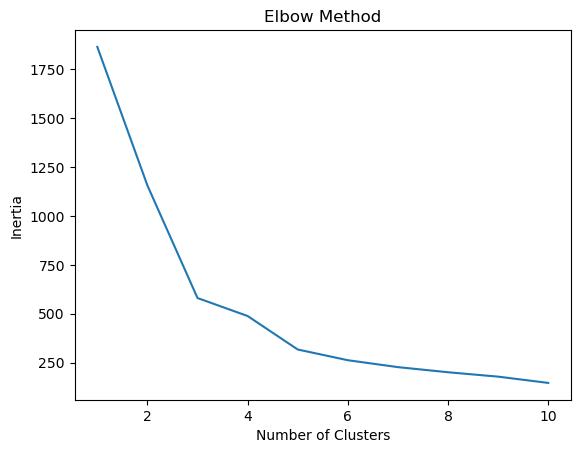

In [57]:
# Determine optimal number of clusters (e.g., using the elbow method)
# (This is a simplified example, more rigorous methods are recommended)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [61]:
# Based on the elbow method, choose an appropriate number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm_data['Cluster']

C:\Users\mahap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


0      0
1      2
2      1
3      3
4      1
      ..
994    1
995    3
996    0
997    0
998    0
Name: Cluster, Length: 932, dtype: int32

In [65]:
# Prepare data for Prophet (requires a specific format: 'ds' for date, 'y' for target variable)
prophet_data = data.groupby('Date')['Total Amount'].sum().reset_index()
prophet_data.columns = ['ds', 'y'] 
prophet_data

,ds,y
0,2023-01-01,3600
1,2023-01-02,1765
2,2023-01-03,600
3,2023-01-04,1240
4,2023-01-05,1100
...,...,...
340,2023-12-27,700
341,2023-12-28,2075
342,2023-12-29,3400
343,2023-12-31,50


In [67]:
# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)
model

23:01:46 - cmdstanpy - INFO - Chain [1] start processing
23:01:46 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
# Make future predictions
future = model.make_future_dataframe(periods=30) # Predict for the next 30 days
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,1308.766360,-472.681030,2766.704447,1308.766360,1308.766360,-197.198003,-197.198003,-197.198003,-197.198003,-197.198003,-197.198003,0.0,0.0,0.0,1111.568357
1,2023-01-02,1308.873010,-195.891331,3007.166749,1308.873010,1308.873010,54.953841,54.953841,54.953841,54.953841,54.953841,54.953841,0.0,0.0,0.0,1363.826851
2,2023-01-03,1308.979659,-244.119679,3078.264341,1308.979659,1308.979659,94.610442,94.610442,94.610442,94.610442,94.610442,94.610442,0.0,0.0,0.0,1403.590101
3,2023-01-04,1309.086309,-339.510693,2826.413416,1309.086309,1309.086309,-43.901258,-43.901258,-43.901258,-43.901258,-43.901258,-43.901258,0.0,0.0,0.0,1265.185051
4,2023-01-05,1309.192958,-504.425138,2585.610549,1309.192958,1309.192958,-224.930394,-224.930394,-224.930394,-224.930394,-224.930394,-224.930394,0.0,0.0,0.0,1084.262564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2024-01-27,1350.465559,148.233773,3164.833078,1350.465549,1350.465570,285.006737,285.006737,285.006737,285.006737,285.006737,285.006737,0.0,0.0,0.0,1635.472297
371,2024-01-28,1350.572206,-416.192260,2785.408807,1350.572195,1350.572217,-197.198003,-197.198003,-197.198003,-197.198003,-197.198003,-197.198003,0.0,0.0,0.0,1153.374203
372,2024-01-29,1350.678853,-169.400626,2988.281140,1350.678841,1350.678865,54.953841,54.953841,54.953841,54.953841,54.953841,54.953841,0.0,0.0,0.0,1405.632694
373,2024-01-30,1350.785500,-200.798358,3031.947486,1350.785487,1350.785512,94.610442,94.610442,94.610442,94.610442,94.610442,94.610442,0.0,0.0,0.0,1445.395942


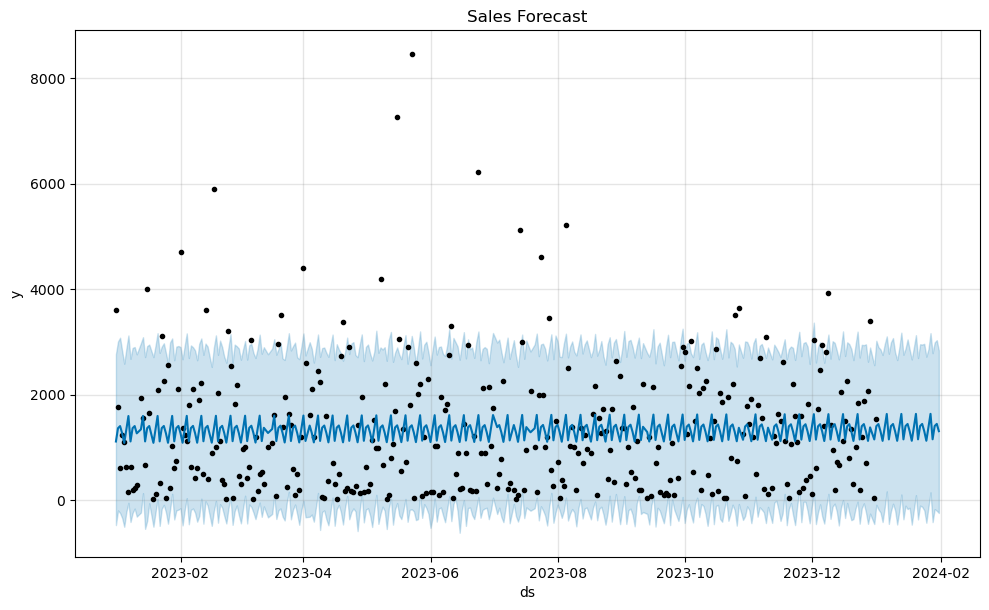

In [73]:
# Plot the forecast
model.plot(forecast)
plt.title("Sales Forecast")
plt.show()

#### Key Findings and Insights:

Total Revenue:456000

Average Transaction Value: 456.0

Top Selling Product Categories:
Clothing       351
Electronics    342
Beauty         307

Customer Behavior:
Number of Unique Customers: 1000
Average Transactions per Customer:1.0

Gender Analysis:
Total Sales by Gender: (Visualize with a bar chart)
Female    232840
Male      223160

Customer Age Distribution:Visualize age distribution with a histogram

Customer Segmentation:'Recency', 'Frequency', 'Monetary'
Sales Forecast:prediction for 30 days according to these points
"ds, trend,	yhat_lower,	yhat_upper,	trend_lower,	trend_upper	, additive_terms,	additive_terms_lower,	additive_terms_upper,	weekly,	weekly_lower,	weekly_upper,	multiplicative_terms,	multiplicative_terms_lower,	multiplicative_terms_upper,	yhat"
Describe the sales forecast generated by the Prophet model, including predicted future sales trends.

Limitations of the Analysis:

Data Limitations:
Potential data quality issues (missing values, inconsistencies) can impact the accuracy of the analysis.
The dataset might not include all relevant variables (e.g., marketing campaigns, competitor information).
Model Limitations:
The accuracy of the K-Means clustering and the Prophet forecasting model depends on various factors and assumptions.
External factors not included in the model (e.g., economic conditions, seasonality) can affect actual sales.
Actionable Recommendations:

Target high-value customers with personalized offers:
Implement targeted marketing campaigns based on customer segments (e.g., exclusive discounts, loyalty programs, personalized product recommendations).
Improve customer retention strategies for low-frequency customers:
Develop strategies to re-engage inactive customers (e.g., win-back campaigns, personalized offers, loyalty programs).
Focus marketing efforts on the most profitable product categories:
Allocate marketing budget and resources to promote the top-selling product categories.
Optimize inventory based on sales forecasts:
Use the sales forecast to optimize inventory levels and minimize stockouts or excess inventory.
Consider implementing loyalty programs to incentivize repeat purchases:
Design and implement loyalty programs to reward repeat customers and encourage increased spending.